In [45]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
import scipy
from scipy.sparse import csr_matrix
import scipy.linalg as la
from scipy.special import erf
import networkx as nx

In [26]:
E = pd.read_table('airport_network.txt', header = None, sep = ' ')

In [22]:
E.tail()

,0,1,2
30496,7933,1222,1
30497,7933,1230,1
30498,7946,1979,1
30499,7976,1145,2
30500,7976,1147,1


In [28]:
E = np.array(E)

In [33]:
k_thr = 10 # threshold on degree sequence
#A = sparse(E(:,1),E(:,2),ones(size(E,1),1)); equivalent in matlab
A = csr_matrix((np.ones(len(E[:,0])), (E[:,0], E[:,1])), dtype=int) #Forming adjacency matrix
A = csr_matrix(A + np.transpose(A)) #Symmetrizing adjacency matrix
A[A>1]=1
ind = np.where(sum(A).A > k_thr)[1] # Restricting to airports with a minimum number of connections (within dataset)
A = A[ind, :][:, ind]  #Restricting matrix to non-disconnected nodes
N = len(A.A) #Dimension of adjacency matrix

# Visualization of adjacency matrix

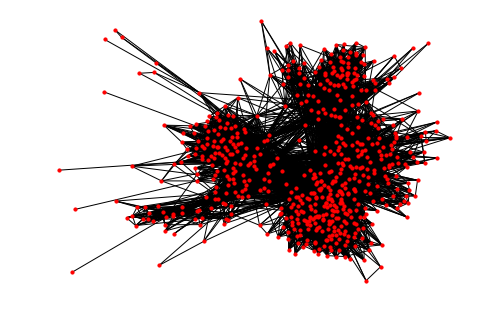

In [58]:
G = nx.Graph(A)
nx.draw(G, node_size = 10)

In [56]:
A

<613x613 sparse matrix of type '<class 'numpy.int64'>'
	with 19828 stored elements in Compressed Sparse Row format>

# Fit of log-normal distribution

<Figure size 432x288 with 0 Axes>

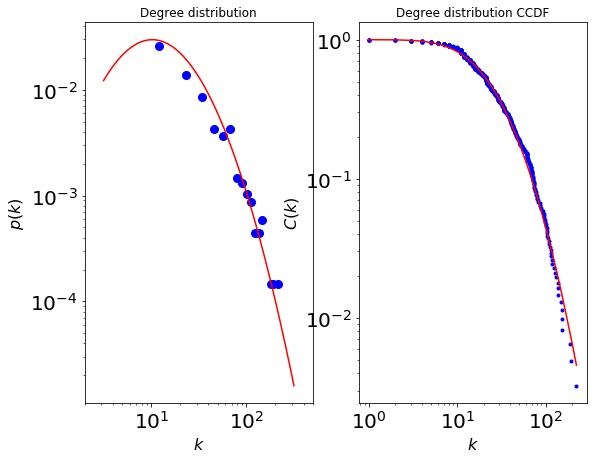

In [73]:
k = sum(A.A) #Degree sequence
                # Counting the number of neighbors
#Plotting histogram of degree sequence
b, a, ptch= plt.hist(k, bins=20, normed= True)
plt.clf() #不输出histogram

fig,ax = plt.subplots(1,2,figsize=(9,7))
ax[0].loglog(a[:-1], b, marker='o',linewidth=0, markersize=8, color ='b')

# Matching first two moments to fit a log-normal distribution
x = np.logspace(0.5,2.5,500)
m = np.mean(np.log(k)) # Mean of log of degree sequence
s = np.std(np.log(k)) # Std. deviation of log of degree sequence
y = np.exp(-(np.log(x)-m)**2/(2*s**2))/(x*s*np.sqrt(2*np.pi))



ax[0].plot(x,y,'r',linewidth=1.5)
ax[0].set_title('Degree distribution')
ax[0].set_xlabel('$k$',fontsize=16)
ax[0].set_ylabel('$p(k)$',fontsize=16)
ax[0].tick_params(direction='out', labelsize=20)
ax[0].set_xlim(2,500)

#%%% Plotting CCDF of degree sequence vs log-normal fit
x = np.sort(k);# % Returns sorted in ascending order
y = list(range(len(k))) 
y = 1 - np.array(y)/(len(k)+1)# % Calculating CCDF
ax[1].loglog(x,y,'.b')

c = 1-0.5*(1 + erf((np.log(x)-m)/(np.sqrt(2)*s)))  #Log-normal CCDF

ax[1].plot(x,c,'r',linewidth=1.5)
ax[1].set_title('Degree distribution CCDF')
ax[1].set_xlabel('$k$',fontsize=16)
ax[1].set_ylabel('$C(k)$',fontsize=16)
ax[1].tick_params(direction='out', labelsize=20)

plt.show()

# clustering coefficient

In [75]:
# Isolating diagonal of cube of adjacency matrix (which provides count of
# undirected triangles each node takes part in)

C_coeff = np.diag((A*A*A).A)/2 #counts of the number of triangles each node participates in 
C_coeff = 2*C_coeff/(k*(k-1)) #Clustering coefficient

# Removing NaNs or Infs due to nodes with 0 or 1 neighbors
C_coeff[np.where(np.isnan(C_coeff) | np.isinf(C_coeff) )] = 0

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


In [315]:
k.shape

(613,)

In [80]:
C_coeff

array([0.67857143, 0.58571429, 0.53684211, 0.5       , 0.75      ,
       0.61029412, 0.86666667, 0.33333333, 0.32235294, 0.45      ,
       0.64835165, 0.        , 0.47950089, 0.23683168, 0.        ,
       0.50497866, 0.8030303 , 0.61538462, 0.71212121, 0.51778656,
       0.72727273, 0.96428571, 0.60079051, 0.36315789, 0.51896392,
       0.625     , 0.69090909, 0.28040033, 0.28376623, 0.34965035,
       0.76666667, 0.15066464, 0.79487179, 0.41189189, 0.30692336,
       0.266209  , 0.24986777, 0.42389758, 0.66176471, 0.33318701,
       0.35648148, 0.37933635, 0.41625616, 0.33222591, 0.27142857,
       0.71111111, 0.48522167, 0.50819672, 0.65151515, 0.54679803,
       0.33918129, 0.21861282, 0.2521978 , 0.36190476, 0.2703373 ,
       0.26298701, 0.2442623 , 0.18382353, 0.50592885, 0.4       ,
       0.41904762, 0.16399287, 0.22050224, 0.29014396, 0.56060606,
       0.32568027, 0.26734505, 0.46323529, 0.41109531, 0.37101449,
       0.41501976, 0.20140872, 0.52813853, 0.17370867, 0.35988

In [81]:
w, vr = la.eig(A.A)

# Centrality 

In [76]:
# Top 10 nodes in degree
sk = np.sort(k)
ind_sort = np.argsort(k) #argsort函数返回的是数组值从小到大的索引值


for i in range(10):
    
    print('Degree = {}, ID = {}'.format(sk[-1-i],ind[ind_sort[-1-i]]))

    
# Top 10 nodes in eigenvector centrality 

w, vr = la.eig(A.A)
V = vr[:, np.argmax(w)] # argmax返回的是最大数的索引
sV = np.sort(abs(V))
ind_sort = np.argsort(abs(V))

for i in range(10):
    
    print('Eig. centrality = {:.3f}, ID = {}'.format(sV[-1-i],ind[ind_sort[-1-i]]))

Degree = 224, ID = 340
Degree = 194, ID = 580
Degree = 189, ID = 1382
Degree = 154, ID = 502
Degree = 153, ID = 507
Degree = 152, ID = 1229
Degree = 150, ID = 1555
Degree = 138, ID = 346
Degree = 137, ID = 1701
Degree = 137, ID = 2188
Eig. centrality = 0.183, ID = 340
Eig. centrality = 0.170, ID = 580
Eig. centrality = 0.166, ID = 1382
Eig. centrality = 0.147, ID = 1555
Eig. centrality = 0.145, ID = 507
Eig. centrality = 0.143, ID = 346
Eig. centrality = 0.140, ID = 1229
Eig. centrality = 0.135, ID = 1218
Eig. centrality = 0.134, ID = 1678
Eig. centrality = 0.127, ID = 1701


# Generating null models and testing properties of empirical network

In [95]:
nmods = 100
xstar = pd.read_table('fitness_values.txt', header = None)

In [98]:
xstar.shape

(613, 1)

In [110]:
xstar = np.array(xstar)

In [111]:
P = xstar*xstar.T / (np.ones(N)+ xstar*xstar.T)

In [113]:
P

array([[2.67605949e-03, 7.36314198e-03, 6.98530231e-03, ...,
        5.87565266e-03, 3.72088332e-03, 3.26233537e-04],
       [7.36314198e-03, 2.00941838e-02, 1.90756051e-02, ...,
        1.60764450e-02, 1.02192095e-02, 9.01346841e-04],
       [6.98530231e-03, 1.90756051e-02, 1.81077042e-02, ...,
        1.52583551e-02, 9.69624235e-03, 8.54808677e-04],
       ...,
       [5.87565266e-03, 1.60764450e-02, 1.52583551e-02, ...,
        1.28514988e-02, 8.15948510e-03, 7.18313655e-04],
       [3.72088332e-03, 1.02192095e-02, 9.69624235e-03, ...,
        8.15948510e-03, 5.17152629e-03, 4.54023769e-04],
       [3.26233537e-04, 9.01346841e-04, 8.54808677e-04, ...,
        7.18313655e-04, 4.54023769e-04, 3.96884248e-05]])

In [310]:
k_null = [] # vector to store all degrees
C_coeff_null = [] # vector to store all clustering coefficients
avg_C_coeff_null = []

'''
    % Generating and symmetrizing null adjacency matrix. This is done by
    % first generating a square matrix of random numbers between 0 and 1,
    % and converting to ones those that are below the corresponding
    % connectivity probabilities. Then the matrix is made symmetric by
    % "flipping" its upper triangular part with respect to the main
    % diagonal
'''
for nm in range(nmods):
    M = np.random.rand(N,N) < P
    M = 1*M
    M = np.triu(M,1)
    M = M + M.T
    
    k_null.append(sum(M).T)
    
    #measuring clustering coefficient
    C_coeff_tmp = np.diag((np.dot(np.dot(M,M),M)))/2
    C_coeff_tmp = 2 * C_coeff_tmp / k*(k-1)
    
    C_coeff_tmp[np.where(np.isnan(C_coeff_tmp) | np.isinf(C_coeff_tmp) )] = 0
    
    C_coeff_null.append(C_coeff_tmp.T)
    
    avg_C_coeff_null.append(np.mean(C_coeff_tmp))

In [253]:
sk = np.sort(k)
ind_sort = np.argsort(k)

In [254]:
k_null = np.array(k_null)

In [259]:
ind_sort.shape

(613,)

In [260]:
k_null = k_null.T[ind_sort, :]

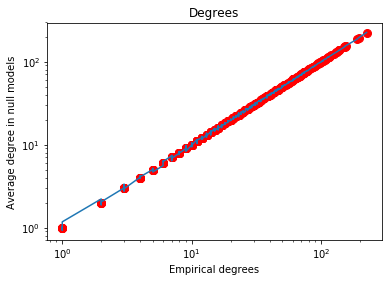

In [263]:

plt.loglog(sk, sk, marker='o',linewidth=0, markersize=8, color ='r')
plt.plot(sk, np.mean(k_null,axis = 1))
plt.title('Degrees')
plt.xlabel('Empirical degrees')
plt.ylabel('Average degree in null models')

plt.show()

Text(0, 0.5, 'Average clustering coefficient in null models')

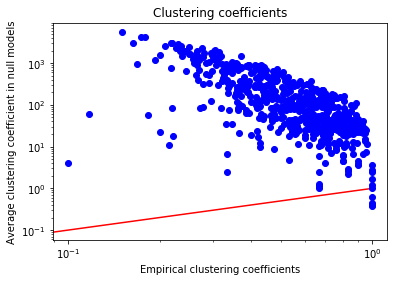

In [311]:
# % Plotting empirical clustering coefficients vs those measured in the null model

sc = np.sort(C_coeff)
ind_sort = np.argsort(C_coeff)
C_coeff_null = np.array(C_coeff_null)

C_coeff_null_2 = C_coeff_null.T[ind_sort,:]
plt.loglog(sc, sc, color = 'r')
plt.plot(sc, np.mean(C_coeff_null_2,axis = 1),'ob')
plt.title('Clustering coefficients')
plt.xlabel('Empirical clustering coefficients')
plt.ylabel('Average clustering coefficient in null models')

In [292]:
print(np.mean(C_coeff))

0.5573276896662023


In [293]:
np.quantile(avg_C_coeff_null, 0.005)

281.88489679358094

In [294]:
C_coeff_tmp = np.diag((np.dot(np.dot(M,M),M)))/2